## World Food Production Descriptive Analysis.

This notebook tries to explain some insights thhrough descriptive analysis of world food production.
Data is taken from https://www.kaggle.com/dorbicycle/world-foodfeed-production


Here are some general questions for the problem statement:

1. what are the highest commodities produced by the world ?
2. how is the trend of amount of commodities produced in every 10 years by the world ?
3. how is the trend of amount of commodities produced by certain country (Indonesia) ?
4. what are the countries those highest in producing certain commodity (Rice) ?

### Step 1: Data reading and cleaning

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FAO.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [3]:
df.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


In [4]:
df.groupby('Area Abbreviation').Unit.count()

Area Abbreviation
AFG     83
AGO    109
ALB    123
ARE    121
ARG    123
      ... 
WSM    108
YEM    119
ZAF    140
ZMB    120
ZWE    121
Name: Unit, Length: 169, dtype: int64

In [5]:
pd.get_option("display.max_columns", None)
df.describe(include=[np.number])

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


In [6]:
list_of_year = ['Y' + str(year) for year in list(range(1961, 2014))]

In [7]:
pd.set_option('display.max_rows', None)
count_years_series = df.count(axis=0)[list_of_year]

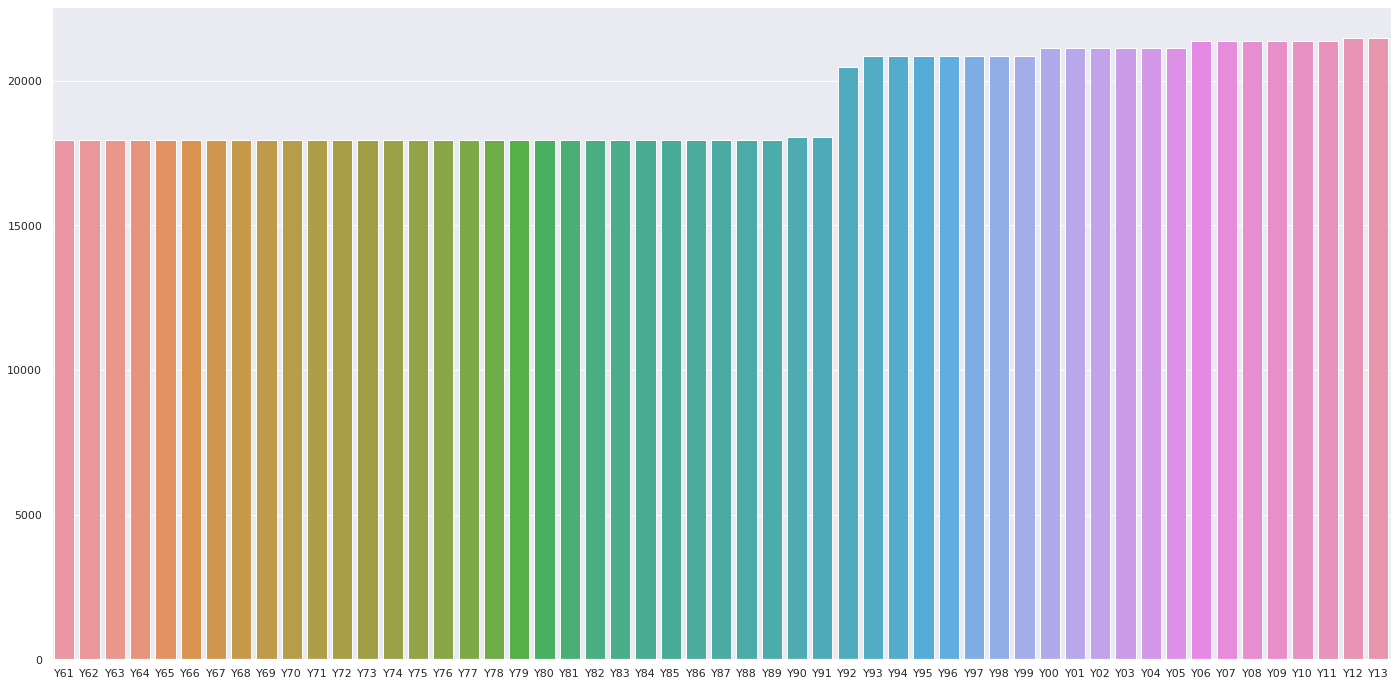

In [8]:
sns.set(rc={'figure.figsize':(24,12)})
list_of_year_display = ['Y' + str(year)[2:4] for year in list(range(1961, 2014))]
sns.barplot(x=list_of_year_display, y=count_years_series)

In [9]:
df.loc[df["Y2013"] < 0, "Y2013"] = np.NaN

In [10]:
df.nunique()

Area Abbreviation     169
Area Code             174
Area                  174
Item Code             117
Item                  115
Element Code            2
Element                 2
Unit                    1
latitude              173
longitude             174
Y1961                1197
Y1962                1215
Y1963                1209
Y1964                1236
Y1965                1259
Y1966                1263
Y1967                1283
Y1968                1300
Y1969                1309
Y1970                1322
Y1971                1351
Y1972                1360
Y1973                1374
Y1974                1388
Y1975                1405
Y1976                1410
Y1977                1411
Y1978                1463
Y1979                1473
Y1980                1477
Y1981                1469
Y1982                1508
Y1983                1528
Y1984                1540
Y1985                1538
Y1986                1563
Y1987                1592
Y1988                1613
Y1989       

In [11]:
list_item_unique = df["Item"].unique()

In [12]:
number_last_year = 40
df_wheat = df.loc[df['Item'] == 'Wheat and products'][list_of_year[-1 * number_last_year:]]
df_wheat['total'] = df_wheat.sum(axis=1)
total_wheat = df_wheat['total'].sum(axis=0)
total_wheat

16899772.0

In [13]:
item_amount_dict = {}
number_last_year = 40
for item in list_item_unique:
    df_item = df.loc[df['Item'] == item][list_of_year[-1 * number_last_year:]]
    df_item['total'] = df_item.sum(axis=1)
    amount_item = df_item['total'].sum(axis=0)    
    
    item_amount_dict[item] = amount_item
item_amount_dict

{'Wheat and products': 16899772.0,
 'Rice (Milled Equivalent)': 12390075.0,
 'Barley and products': 3669647.0,
 'Maize and products': 17255509.0,
 'Millet and products': 942551.0,
 'Cereals, Other': 619851.0,
 'Potatoes and products': 7778439.0,
 'Sugar cane': 1802279.0,
 'Sugar beet': 228173.0,
 'Sugar (Raw Equivalent)': 4058679.0,
 'Sweeteners, Other': 530397.0,
 'Honey': 42537.0,
 'Pulses, Other and products': 880464.0,
 'Nuts and products': 302099.0,
 'Coconuts - Incl Copra': 594858.0,
 'Sesame seed': 30647.0,
 'Olives (including preserved)': 60613.0,
 'Soyabean Oil': 643295.0,
 'Groundnut Oil': 145965.0,
 'Sunflowerseed Oil': 235944.0,
 'Rape and Mustard Oil': 275488.0,
 'Cottonseed Oil': 112395.0,
 'Palm Oil': 298861.0,
 'Sesameseed Oil': 22349.0,
 'Olive Oil': 79772.0,
 'Oilcrops Oil, Other': 49075.0,
 'Tomatoes and products': 3127343.0,
 'Vegetables, Other': 17040721.0,
 'Oranges, Mandarines': 2334425.0,
 'Citrus, Other': 207521.0,
 'Bananas': 1986266.0,
 'Apples and products':

In [14]:
sorted_item_amount_dict = dict(sorted(item_amount_dict.items(), key=lambda item: item[1], reverse=True))
sorted_item_amount_dict

{'Cereals - Excluding Beer': 55390168.0,
 'Milk - Excluding Butter': 37973440.0,
 'Vegetables': 21670664.0,
 'Starchy Roots': 18505737.0,
 'Maize and products': 17255509.0,
 'Vegetables, Other': 17040721.0,
 'Wheat and products': 16899772.0,
 'Fruits - Excluding Wine': 12645606.0,
 'Rice (Milled Equivalent)': 12390075.0,
 'Potatoes and products': 7778439.0,
 'Meat': 7398727.0,
 'Alcoholic Beverages': 7103320.0,
 'Sugar & Sweeteners': 5029641.0,
 'Cassava and products': 4949316.0,
 'Beer': 4721528.0,
 'Sweet potatoes': 4681855.0,
 'Sugar (Raw Equivalent)': 4058679.0,
 'Fish, Seafood': 4049585.0,
 'Fruits, Other': 3919449.0,
 'Barley and products': 3669647.0,
 'Tomatoes and products': 3127343.0,
 'Eggs': 3033178.0,
 'Pigmeat': 2806261.0,
 'Oranges, Mandarines': 2334425.0,
 'Sorghum and products': 2083068.0,
 'Poultry Meat': 2065231.0,
 'Vegetable Oils': 2045070.0,
 'Sugar Crops': 2030457.0,
 'Bovine Meat': 2011443.0,
 'Bananas': 1986266.0,
 'Oilcrops': 1927146.0,
 'Sugar cane': 1802279.0

In [15]:
nb_of_item_shown = 10
keys = list(sorted_item_amount_dict.keys())[0:nb_of_item_shown]
values = list(sorted_item_amount_dict.values())[0:nb_of_item_shown]

### Step 2 : Data visualisation

#### Graph of 10 highest commodities by the world since 1974 to 2013 (40 years)

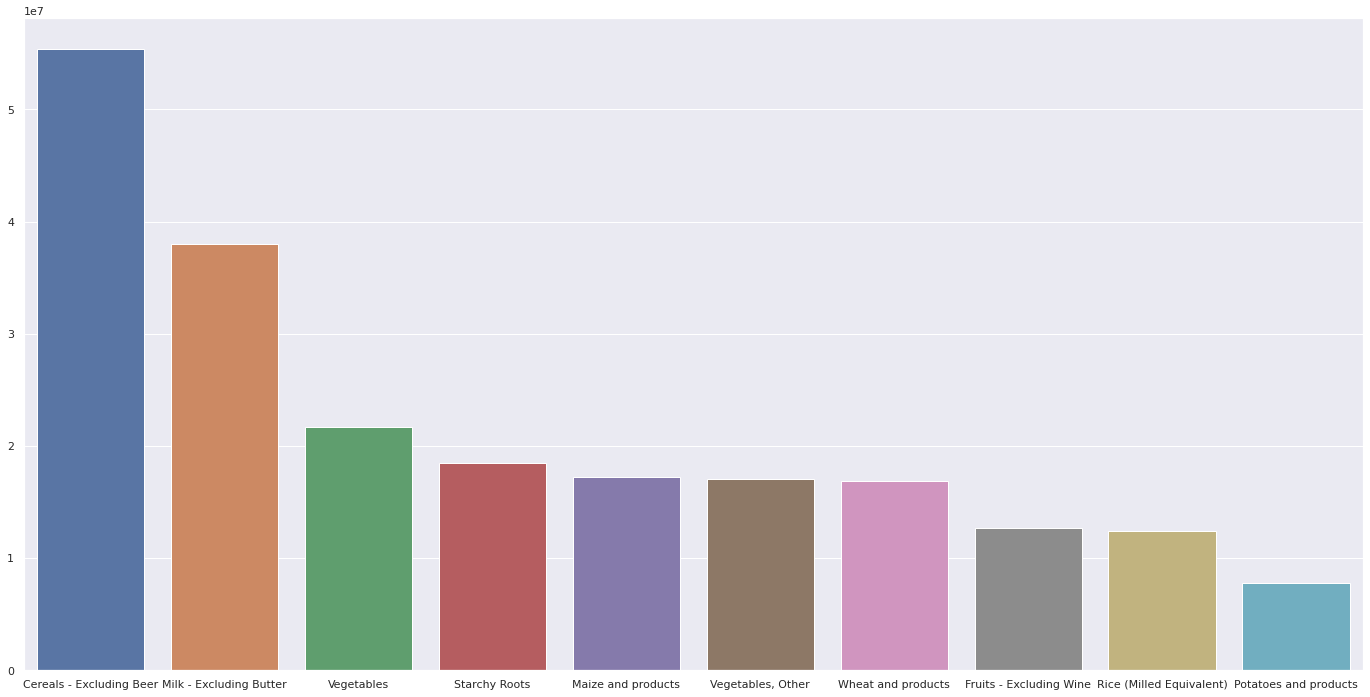

In [16]:
sns.barplot(x=keys, y=values)

####  Trend of amount of commodities produced in every 10 years by the world

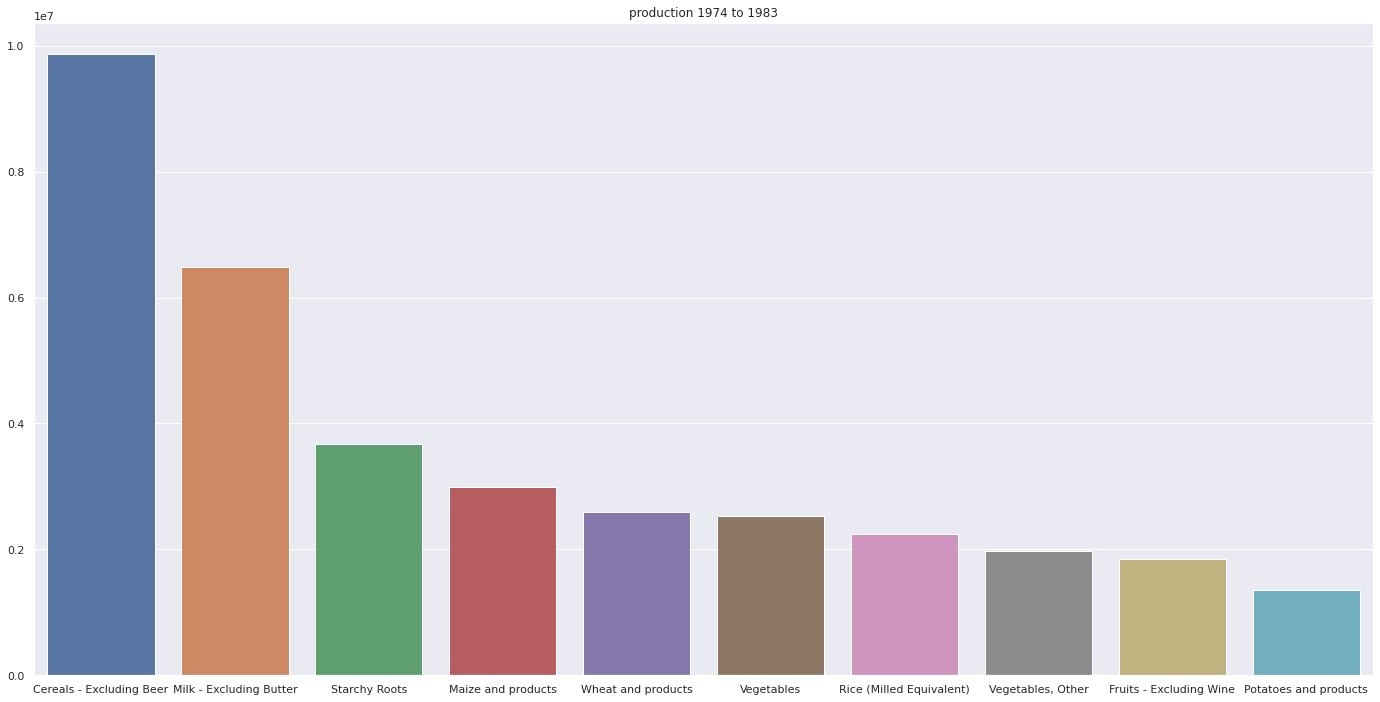

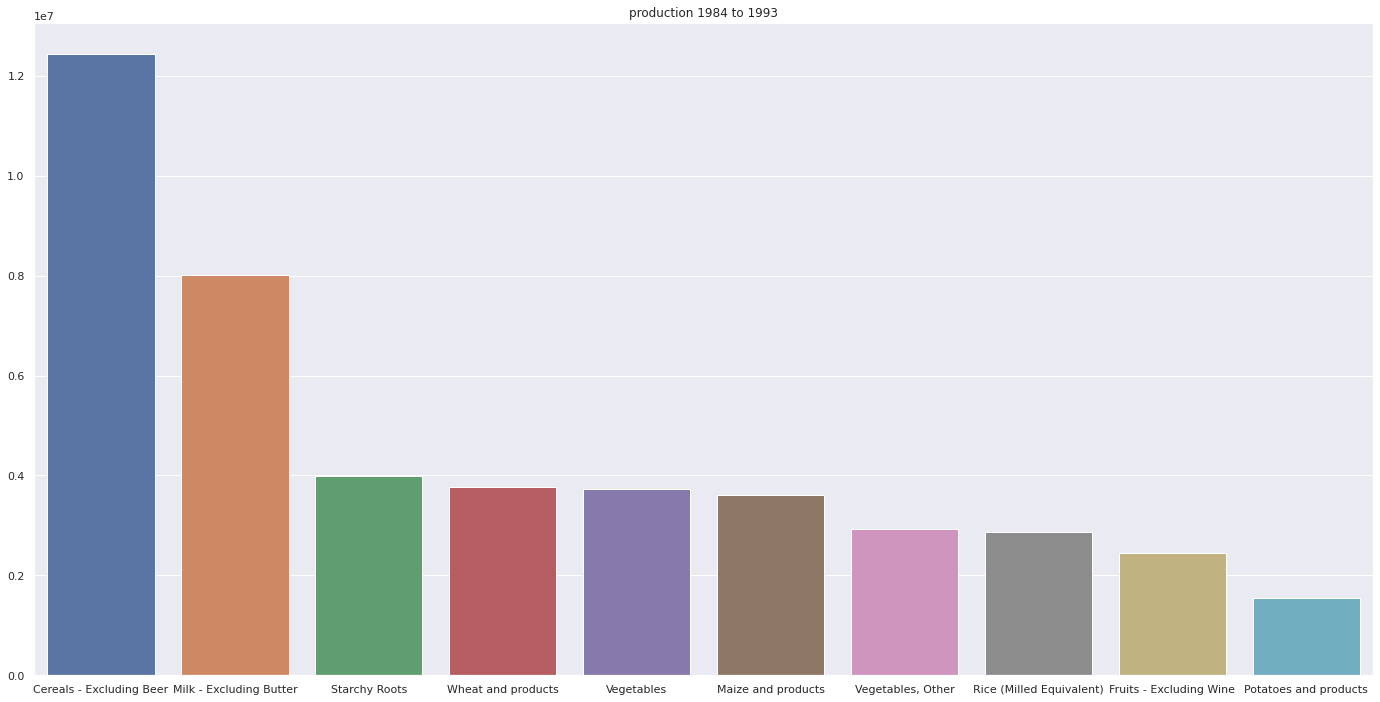

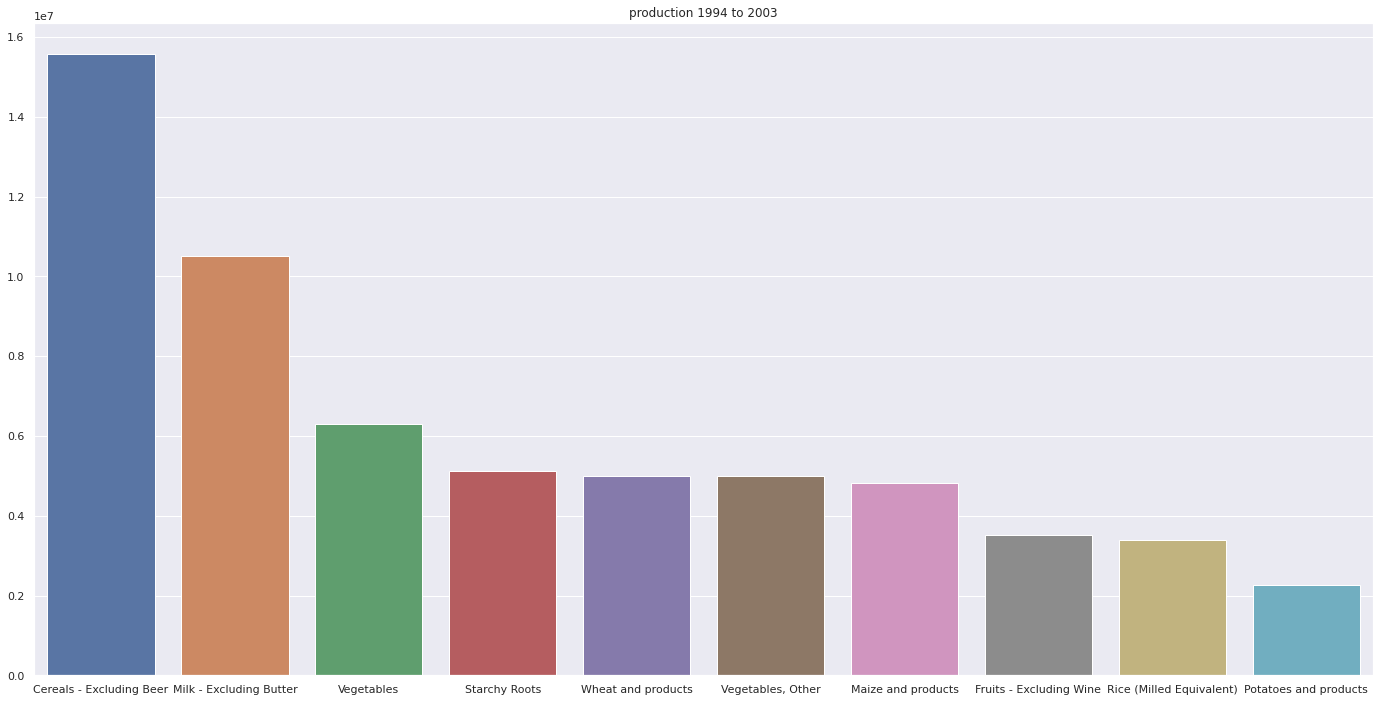

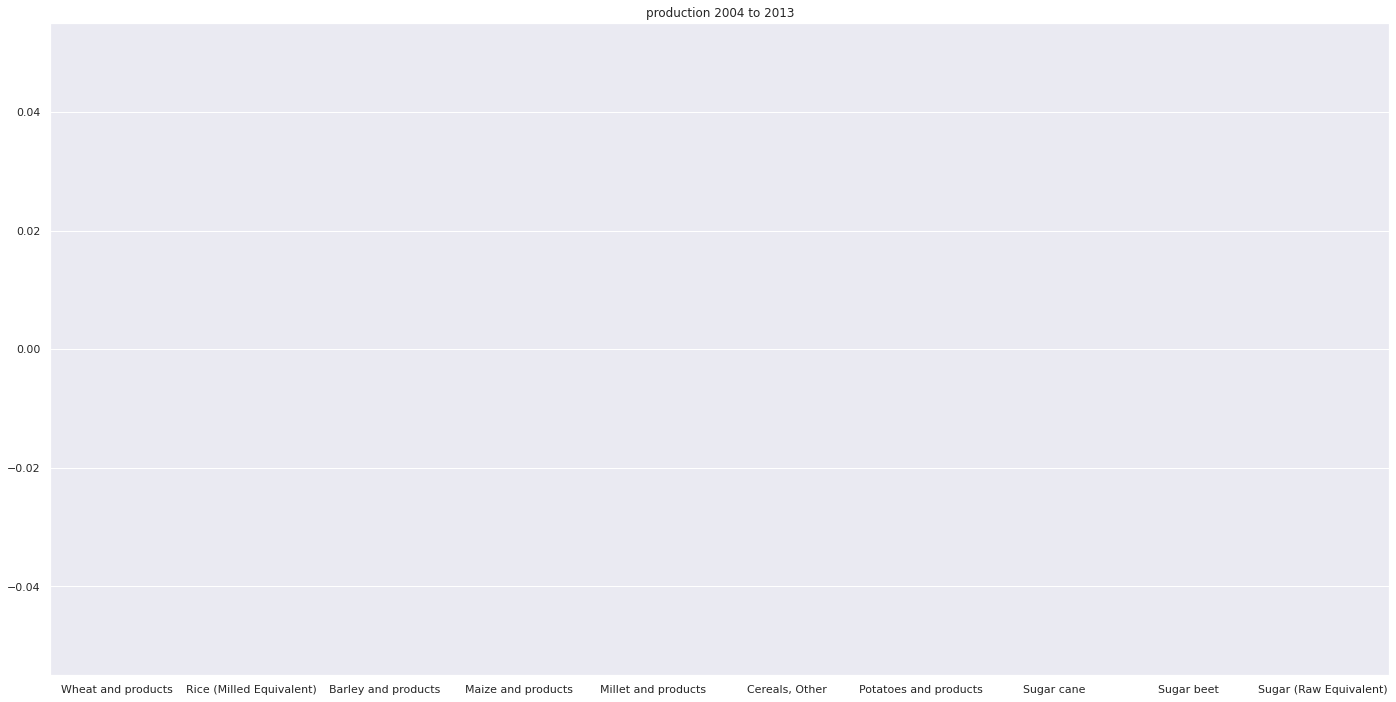

In [17]:
item_amount_dict = {}
number_last_year = 40
interval_year = 10
for n in list(range(40, 0, -1 * interval_year)):
    start_year_idx = -1 * n
    end_year_idx = -1 * (n - interval_year)
    for item in list_item_unique:        
        df_item = df.loc[df['Item'] == item][list_of_year[start_year_idx : end_year_idx]]
        df_item['total'] = df_item.sum(axis=1)
        amount_item = df_item['total'].sum(axis=0)    

        item_amount_dict[item] = amount_item

    sorted_item_amount_dict = dict(sorted(item_amount_dict.items(), key=lambda item: item[1], reverse=True))
    nb_of_item_shown = 10
    keys = list(sorted_item_amount_dict.keys())[0:nb_of_item_shown]
    values = list(sorted_item_amount_dict.values())[0:nb_of_item_shown]

    plt.figure()
    sns.barplot(x=keys, y=values).set(title='production {} to {}'.format(list_of_year[start_year_idx][1:], list_of_year[end_year_idx - 1][1:]))

In [18]:
number_last_year = 40
item_indonesia_amount_dict = {}
for item in list_item_unique:
    df_item_Indonesia = df.loc[(df['Item'] == item) & (df['Area'] == 'Indonesia')][list_of_year[-1 * number_last_year:]]
    df_item_Indonesia['total'] = df_item_Indonesia.sum(axis=1)
    amount_item = df_item_Indonesia['total'].sum(axis=0)    
    
    item_indonesia_amount_dict[item] = amount_item

sorted_item_indonesia_amount_dict = dict(sorted(item_indonesia_amount_dict.items(), key=lambda item: item[1], reverse=True))
nb_of_item_shown = 3
keys = list(sorted_item_indonesia_amount_dict.keys())[0:nb_of_item_shown]
values = list(sorted_item_indonesia_amount_dict.values())[0:nb_of_item_shown]

#### Graph of highest commodities produced by Indonesia

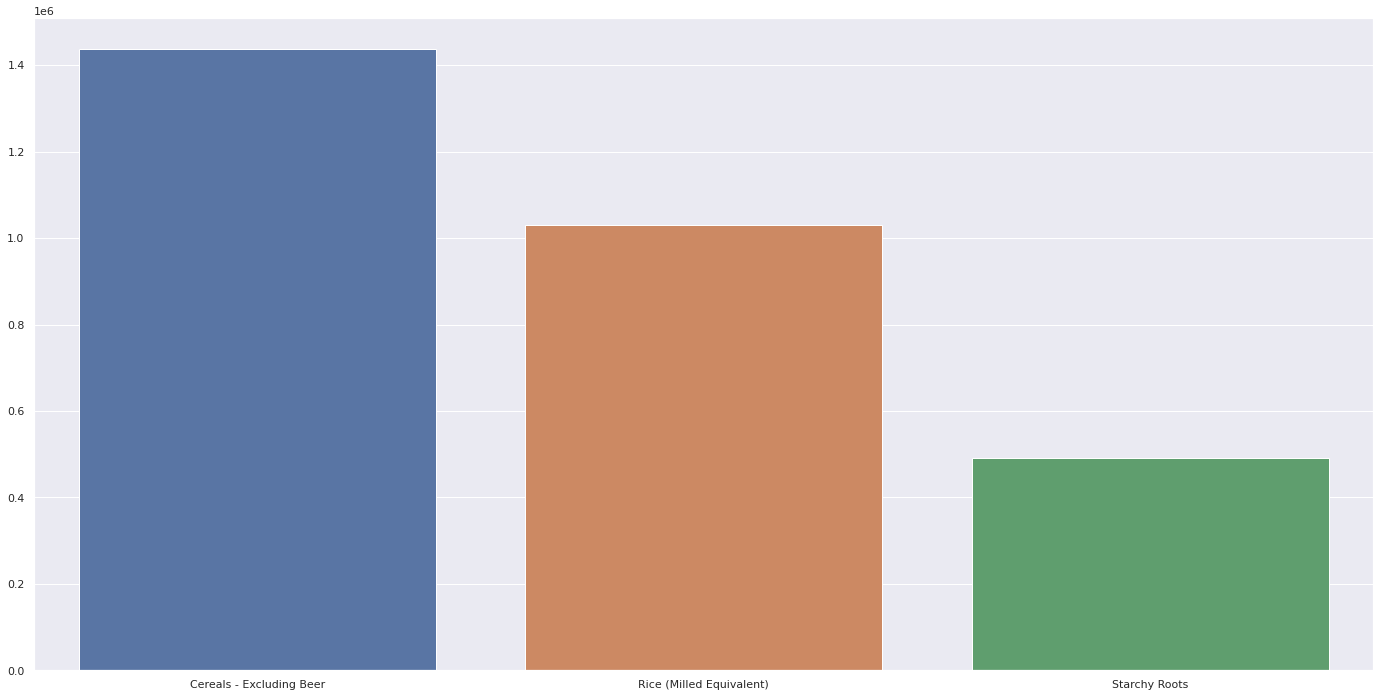

In [19]:
sns.barplot(x=keys, y=values)

In [20]:
selected_items_Indonesia = keys
df_item_Indonesia = df.loc[(df['Item'].isin(selected_items_Indonesia)) & (df['Area'] == 'Indonesia')]
df_item_Indonesia

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
9169,IDN,101,Indonesia,2805,Rice (Milled Equivalent),5521,Feed,1000 tonnes,-0.79,113.92,...,1339.0,1368.0,1461.0,1779.0,1521.0,1626.0,1713.0,1879.0,1873,1832.0
9170,IDN,101,Indonesia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-0.79,113.92,...,27857.0,28092.0,28484.0,29217.0,29989.0,30858.0,31717.0,32431.0,33175,33637.0
9267,IDN,101,Indonesia,2905,Cereals - Excluding Beer,5521,Feed,1000 tonnes,-0.79,113.92,...,4992.0,5517.0,5609.0,6132.0,6071.0,6276.0,6867.0,7560.0,7576,8045.0
9268,IDN,101,Indonesia,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,-0.79,113.92,...,38291.0,38395.0,39843.0,40570.0,42165.0,43668.0,45175.0,46472.0,48297,48845.0
9269,IDN,101,Indonesia,2907,Starchy Roots,5521,Feed,1000 tonnes,-0.79,113.92,...,464.0,461.0,475.0,475.0,515.0,532.0,564.0,588.0,570,572.0
9270,IDN,101,Indonesia,2907,Starchy Roots,5142,Food,1000 tonnes,-0.79,113.92,...,11845.0,11734.0,12008.0,12045.0,12964.0,13649.0,14439.0,14675.0,15370,15042.0


In [21]:
keys

['Cereals - Excluding Beer', 'Rice (Milled Equivalent)', 'Starchy Roots']

In [22]:
df_item_Indonesia = df_item_Indonesia[['Area','Item'] + list_of_year[-1 * number_last_year:]]
df_item_Indonesia_duplicated = df_item_Indonesia
df_item_Indonesia = df_item_Indonesia.drop_duplicates(['Area','Item'], keep='first')
for k in keys:
    condition = df_item_Indonesia_duplicated['Item'] == k       
    df_item_Indonesia_filtered = df_item_Indonesia_duplicated[condition]
    series_sum_food_feed = df_item_Indonesia_filtered[list_of_year[-1 * number_last_year:]].sum(axis=0)
    
    condition = df_item_Indonesia['Item'] == k 
    df_item_Indonesia.loc[condition,list_of_year[-1 * number_last_year:]] = series_sum_food_feed.values
    
df_item_Indonesia = df_item_Indonesia.drop('Area', axis=1)
df_item_Indonesia

/home/restu2/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Item,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
9169,Rice (Milled Equivalent),14415.0,15495.0,15921.0,16214.0,16746.0,18137.0,18555.0,19436.0,21004.0,...,29196.0,29460.0,29945.0,30996.0,31510.0,32484.0,33430.0,34310.0,35048.0,35469.0
9267,Cereals - Excluding Beer,18128.0,18905.0,19356.0,19954.0,21396.0,22272.0,23692.0,24640.0,25284.0,...,43283.0,43912.0,45452.0,46702.0,48236.0,49944.0,52042.0,54032.0,55873.0,56890.0
9269,Starchy Roots,12608.0,12108.0,12111.0,12257.0,11786.0,11188.0,12248.0,12037.0,11411.0,...,12309.0,12195.0,12483.0,12520.0,13479.0,14181.0,15003.0,15263.0,15940.0,15614.0


In [23]:
df_item_Indonesia_to_plot = pd.melt(df_item_Indonesia, id_vars="Item", var_name="Year", value_name="number of productions")
df_item_Indonesia_to_plot

,Item,Year,number of productions
0,Rice (Milled Equivalent),Y1974,14415.0
1,Cereals - Excluding Beer,Y1974,18128.0
2,Starchy Roots,Y1974,12608.0
3,Rice (Milled Equivalent),Y1975,15495.0
4,Cereals - Excluding Beer,Y1975,18905.0
5,Starchy Roots,Y1975,12108.0
6,Rice (Milled Equivalent),Y1976,15921.0
7,Cereals - Excluding Beer,Y1976,19356.0
8,Starchy Roots,Y1976,12111.0
9,Rice (Milled Equivalent),Y1977,16214.0


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


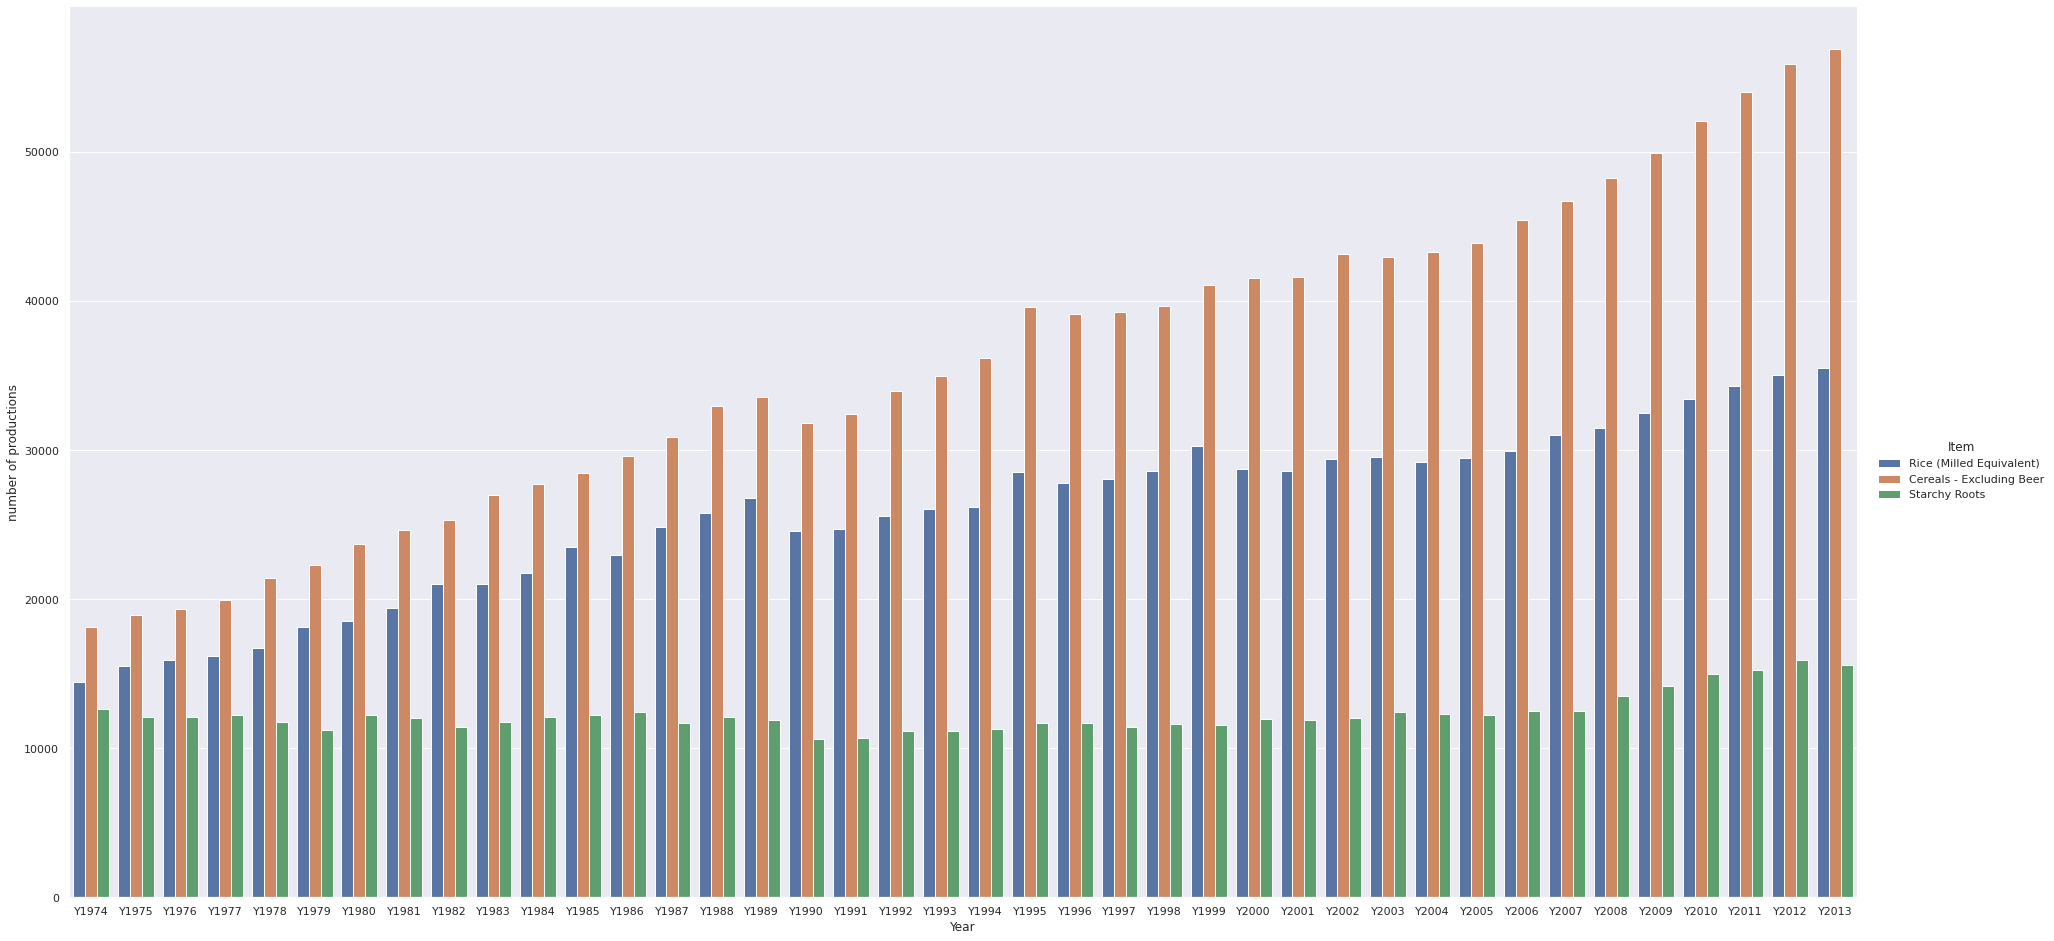

In [24]:
sns.factorplot(x='Year', y='number of productions', hue='Item', data=df_item_Indonesia_to_plot, kind='bar', size=13, aspect=2)

In [25]:
df_rice = df[df["Item"].str.contains("rice", case=False)]
df_rice["Item"].unique()

array(['Rice (Milled Equivalent)', 'Ricebran Oil'], dtype=object)

In [26]:
df_rice = df[(df["Item"] == 'Rice (Milled Equivalent)') & (df["Element"] == 'Food')]
df_rice

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422.0
86,ALB,3,Albania,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,41.15,20.17,...,23.0,24.0,30.0,27.0,20.0,23.0,24.0,21.0,22,25.0
209,DZA,4,Algeria,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,28.03,1.66,...,65.0,51.0,66.0,73.0,94.0,73.0,102.0,80.0,105,117.0
331,AGO,7,Angola,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-11.20,17.87,...,116.0,114.0,117.0,122.0,130.0,138.0,139.0,147.0,182,174.0
440,ATG,8,Antigua and Barbuda,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,17.06,-61.80,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0
558,ARG,9,Argentina,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-38.42,-63.62,...,301.0,240.0,251.0,268.0,314.0,313.0,332.0,318.0,332,364.0
682,ARM,1,Armenia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,40.07,45.04,...,11.0,14.0,17.0,15.0,13.0,13.0,11.0,9.0,9,9.0
814,AUS,10,Australia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-25.27,133.78,...,202.0,205.0,206.0,210.0,247.0,251.0,260.0,248.0,243,258.0
943,AUT,11,Austria,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,47.52,14.55,...,25.0,26.0,25.0,30.0,33.0,30.0,29.0,31.0,34,31.0
1081,AZE,52,Azerbaijan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,40.14,47.58,...,22.0,20.0,18.0,16.0,26.0,22.0,18.0,20.0,17,19.0


In [27]:
df_rice["total_production_food"] = df_rice[list_of_year].sum(axis=1)
df_rice

/home/restu2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total_production_food
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422.0,15282.0
86,ALB,3,Albania,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,41.15,20.17,...,24.0,30.0,27.0,20.0,23.0,24.0,21.0,22,25.0,1109.0
209,DZA,4,Algeria,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,28.03,1.66,...,51.0,66.0,73.0,94.0,73.0,102.0,80.0,105,117.0,1810.0
331,AGO,7,Angola,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-11.20,17.87,...,114.0,117.0,122.0,130.0,138.0,139.0,147.0,182,174.0,3332.0
440,ATG,8,Antigua and Barbuda,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,17.06,-61.80,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,48.0
558,ARG,9,Argentina,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-38.42,-63.62,...,240.0,251.0,268.0,314.0,313.0,332.0,318.0,332,364.0,9025.0
682,ARM,1,Armenia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,40.07,45.04,...,14.0,17.0,15.0,13.0,13.0,11.0,9.0,9,9.0,274.0
814,AUS,10,Australia,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,-25.27,133.78,...,205.0,206.0,210.0,247.0,251.0,260.0,248.0,243,258.0,6088.0
943,AUT,11,Austria,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,47.52,14.55,...,26.0,25.0,30.0,33.0,30.0,29.0,31.0,34,31.0,1643.0
1081,AZE,52,Azerbaijan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,40.14,47.58,...,20.0,18.0,16.0,26.0,22.0,18.0,20.0,17,19.0,540.0


In [28]:
df_rice_to_show = df_rice[["Area Abbreviation","Area","latitude","longitude","total_production_food"]].sort_values('total_production_food', ascending=False)
df_rice_to_show

,Area Abbreviation,Area,latitude,longitude,total_production_food
4123,CHN,"China, mainland",35.86,104.20,4271067.0
9036,IND,India,20.59,78.96,3096326.0
9170,IDN,Indonesia,-0.79,113.92,1114085.0
1321,BGD,Bangladesh,23.68,90.36,863860.0
21011,VNM,Viet Nam,14.06,108.28,482433.0
10074,JPN,Japan,36.20,138.25,445784.0
18820,THA,Thailand,15.87,100.99,346760.0
15249,PHL,Philippines,12.88,121.77,321270.0
2535,BRA,Brazil,-14.24,-51.93,279410.0
13332,MMR,Myanmar,21.91,95.96,246736.0


#### Graph of countries those most producing rice

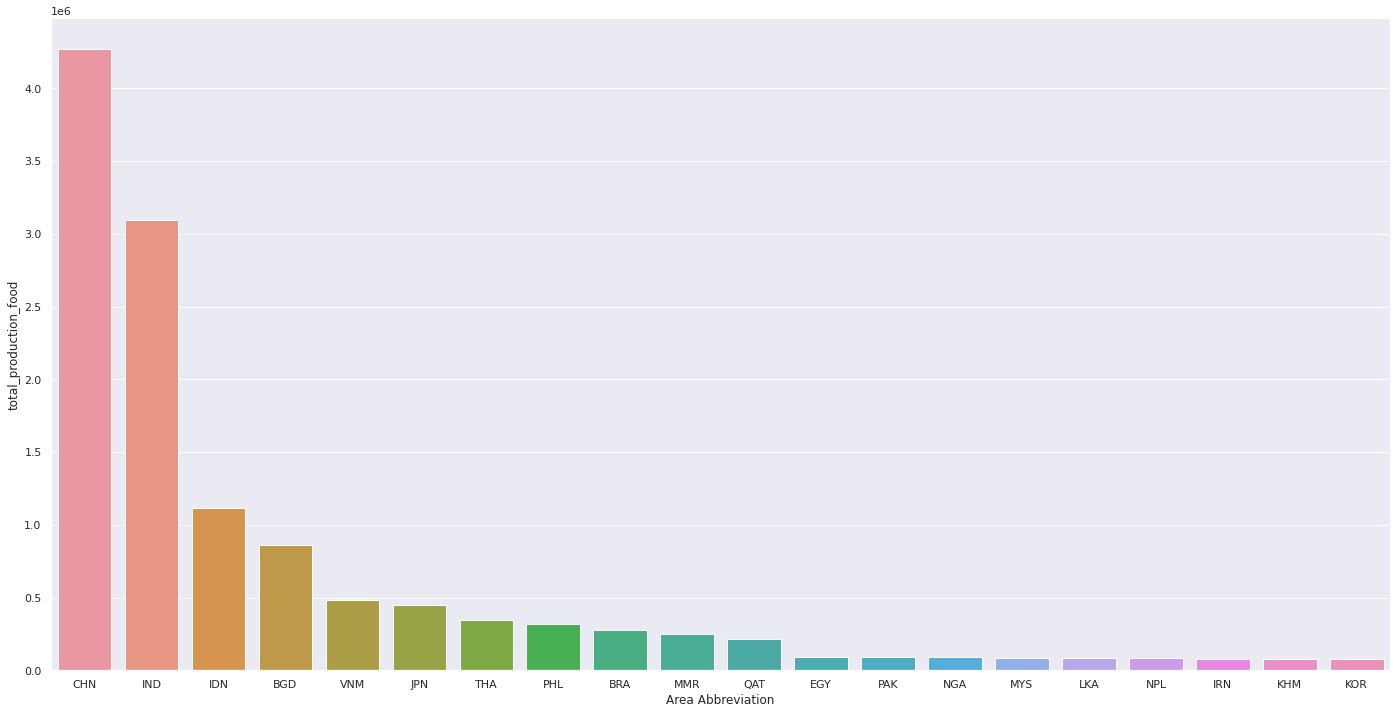

In [29]:
sns.barplot(x=df_rice_to_show.iloc[:20,:]["Area Abbreviation"], y=df_rice_to_show.iloc[:20,:]["total_production_food"])

Conclusion :

- Cereals - Excluding Beer, Milk - Excluding Butter, and Vegetables are 3 most commodities produced by the world
- Indonesia most food commodities are Cereals - Excluding Beer, Rice (Milled Equivalent), and Starchy Roots
- China, India, and Indonesa are three countries that most produce rice.
